In [18]:
import os
import numpy as np
import pickle 
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [36]:
def from_ij_to_idx(i, j, n_i):
    idx = j * n_i + i
    return idx

def from_idx_to_ij(idx, n_i):
    frac = float(idx)/float(n_i)
    j = int(frac)
    i = int((frac - j) * n_i)
    return i, j

In [3]:
features = pd.read_pickle('features/features.pkl')

In [72]:
len(features.columns)

290

In [8]:
types = features[['LCtype']]

1. RR Lyr ab (2923); 
2. RR Lyr c (990); 
3. Algol-like with 1 minimum (20); 
4. Algol-like with 2 minima (357); 
5. contact binary (2385); 
6. delta Scu/SX Phe (112); 
7. long-period variable, including semi-regular variables (77); 
8. hearbeat candidates (1); 
9. BL Her (6); 
10. [yes, class 10 is missing]. 
11. anomalous Cepheids (5); 
0. other (318, including some quasars)  

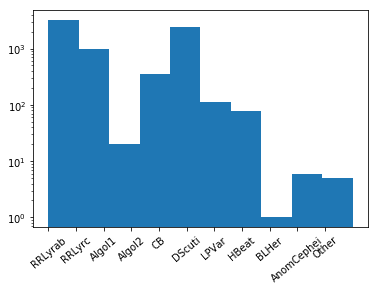

In [40]:
plt.hist(types.as_matrix(), log=True)
plt.xticks(range(11), ['RRLyrab', 'RRLyrc', 'Algol1', 'Algol2', 
            'CB', 'DScuti', 'LPVar', 'HBeat', 'BLHer', 
            'AnomCephei', 'Other'], rotation=40)
plt.show()

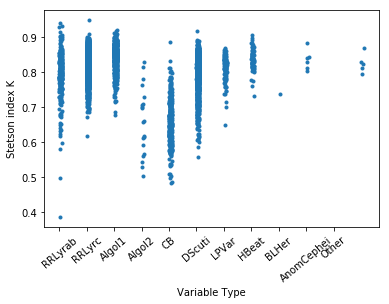

In [26]:
plt.plot(features['LCtype']+np.random.random(len(features))*0.1, 
         features['StetsonK'], '.')
plt.xlabel('Variable Type')
plt.xticks(range(11), ['RRLyrab', 'RRLyrc', 'Algol1', 'Algol2', 
            'CB', 'DScuti', 'LPVar', 'HBeat', 'BLHer', 
            'AnomCephei', 'Other'], rotation=40)
plt.ylabel('Stetson index K')

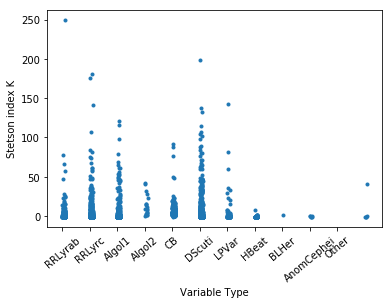

In [27]:
plt.plot(features['LCtype']+np.random.random(len(features))*0.1, 
         features['SmallKurtosis'], '.')
plt.xlabel('Variable Type')
plt.xticks(range(11), ['RRLyrab', 'RRLyrc', 'Algol1', 'Algol2', 
            'CB', 'DScuti', 'LPVar', 'HBeat', 'BLHer', 
            'AnomCephei', 'Other'], rotation=40)
plt.ylabel('Small Kurtosis')

/home/bruno/.virtualenvs/feetsLINEAR/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


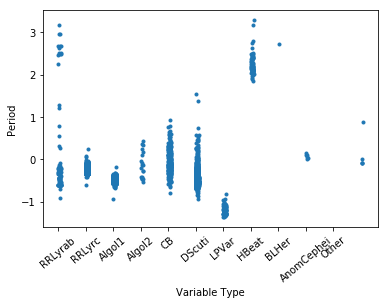

In [30]:
plt.plot(features['LCtype']+np.random.random(len(features))*0.1, 
         np.log10(features['P']), '.')
plt.xlabel('Variable Type')
plt.xticks(range(11), ['RRLyrab', 'RRLyrc', 'Algol1', 'Algol2', 
            'CB', 'DScuti', 'LPVar', 'HBeat', 'BLHer', 
            'AnomCephei', 'Other'], rotation=40)
plt.ylabel('Period')

In [49]:
for i in range(len(features.columns)):
    print features.columns[i]

LINEARobjectID
LCtype
P
A
mmed
stdev
rms
Lchi2pdf
nObs
skew
kurt
LR
CUF
t2
t3
AMP
Amplitude
AndersonDarling
Autocor_length
Beyond1Std
CAR_mean
CAR_sigma
CAR_tau
Con
Eta_e
FluxPercentileRatioMid20
FluxPercentileRatioMid35
FluxPercentileRatioMid50
FluxPercentileRatioMid65
FluxPercentileRatioMid80
Freq1_harmonics_amplitude_0
Freq1_harmonics_amplitude_1
Freq1_harmonics_amplitude_2
Freq1_harmonics_amplitude_3
Freq1_harmonics_rel_phase_0
Freq1_harmonics_rel_phase_1
Freq1_harmonics_rel_phase_2
Freq1_harmonics_rel_phase_3
Freq2_harmonics_amplitude_0
Freq2_harmonics_amplitude_1
Freq2_harmonics_amplitude_2
Freq2_harmonics_amplitude_3
Freq2_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_1
Freq2_harmonics_rel_phase_2
Freq2_harmonics_rel_phase_3
Freq3_harmonics_amplitude_0
Freq3_harmonics_amplitude_1
Freq3_harmonics_amplitude_2
Freq3_harmonics_amplitude_3
Freq3_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_1
Freq3_harmonics_rel_phase_2
Freq3_harmonics_rel_phase_3
Gskew
LinearTrend
MaxSlope
Mean


In [59]:
n_t = 18 * 12
n_i = 12

In [138]:
signature_cols = features.columns[features.columns.str.startswith('Sign')]

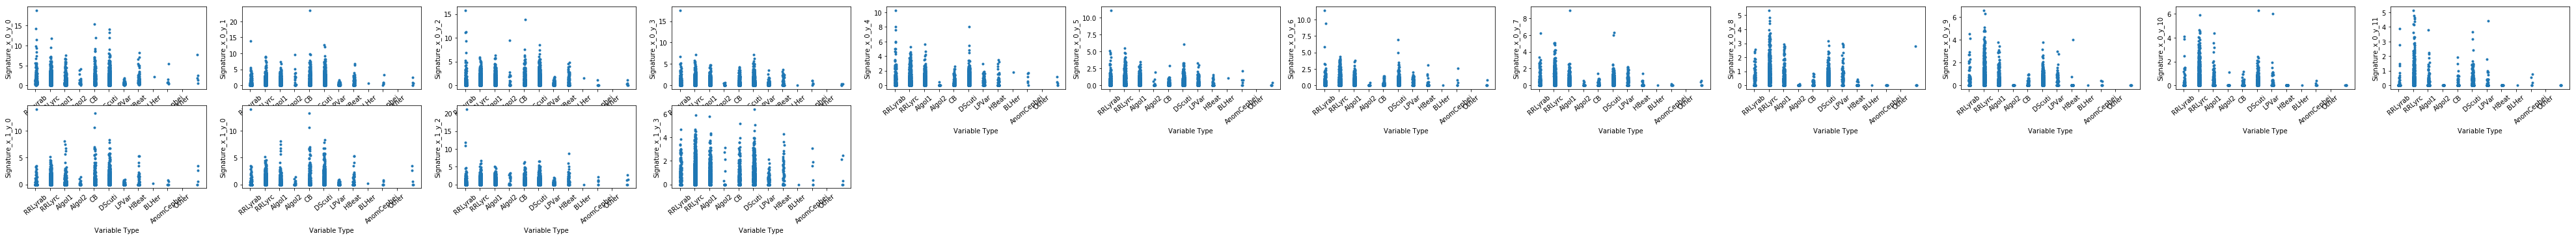

In [69]:
plt.figure(figsize=(70, 50))
for i in range(16):
    plt.subplot(18, 12, i+1)
    y, x = from_idx_to_ij(i, n_i)
    plt.plot(features['LCtype']+np.random.random(len(features))*0.1, 
             features['Signature_x_{}_y_{}'.format(x, y)], '.')
    plt.xlabel('Variable Type')
    plt.xticks(range(11), ['RRLyrab', 'RRLyrc', 'Algol1', 'Algol2', 
                'CB', 'DScuti', 'LPVar', 'HBeat', 'BLHer', 
                'AnomCephei', 'Other'], rotation=40)
    plt.ylabel('Signature_x_{}_y_{}'.format(x, y))
plt.savefig('signatures.pdf', dpi=160)

In [91]:
def from_id_to_signature(starid, n_x=18, n_y=12):
    signature = np.empty((n_y, n_x))
    for x in range(n_x):
        for y in range(n_y):
            signature[y, x] = features.iloc[starid]['Signature_x_{}_y_{}'.format(x, y)]
    return signature

In [122]:
sign = from_id_to_signature(256)

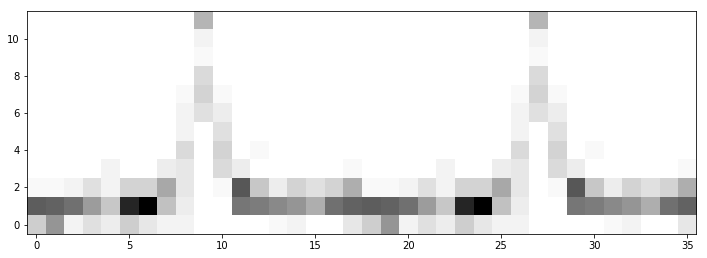

In [123]:
plt.figure(figsize=(12, 6))
plt.imshow(np.tile(sign,2), origin='lower', cmap='gray_r')

In [124]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import feature_selection

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors

In [220]:
def experiment(clf, x, y, nfolds=10, printing=False):
    skf = StratifiedKFold(n_splits=nfolds)
    probabilities = None # np.array([])
    predictions = np.array([])
    y_testing = np.array([])
    
    for train, test in skf.split(x, y):
        
        x_train = x[train]
        y_train = y[train]
        clf.fit(x_train, y_train)

        x_test = x[test]
        y_test = y[test]
        pr = clf.predict(x_test)
        probs = clf.predict_proba(x_test)#[:, 0]
        
        #if probabilities is not None: print 'probabilities.shape = ',probabilities.shape 
        #print 'probs.shape = ', probs.shape
        #print 'predict.shape = ', pr.shape
        probabilities = (
            probs if probabilities is None else
            np.vstack([probabilities, probs]))
        
        predictions = np.hstack([predictions, pr])
        y_testing = np.hstack([y_testing, y_test])

    if printing: 
        print metrics.classification_report(y_testing, predictions)
    fpr, tpr, thresholds = metrics.roc_curve(y_testing, 1.-probabilities[:, 0])
    prec_rec_curve = metrics.precision_recall_curve(y_testing, 1.- probabilities[:, 0])
    roc_auc = metrics.auc(fpr, tpr)
    return {'fpr': fpr, 
            'tpr': tpr, 
            'thresh': thresholds, 
            'roc_auc': roc_auc, 
            'prec_rec_curve': prec_rec_curve,
            'y_test': y_testing, 
            'predictions': predictions,
            'probabilities': probabilities, 
            'confusion_matrix': metrics.confusion_matrix(y_testing, predictions),
            }

In [230]:
rrlyra = features.LCtype == 1
rrlyrc = features.LCtype == 2
cbinar = features.LCtype == 5

In [231]:
subset = features[rrlyra | rrlyrc]

In [232]:
X = subset[signature_cols].as_matrix()
Y = subset.LCtype.values > 1

In [247]:
pca = decomposition.PCA(svd_solver='randomized', n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [248]:
X_tr = pca.transform(X)

/home/bruno/.virtualenvs/feetsLINEAR/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


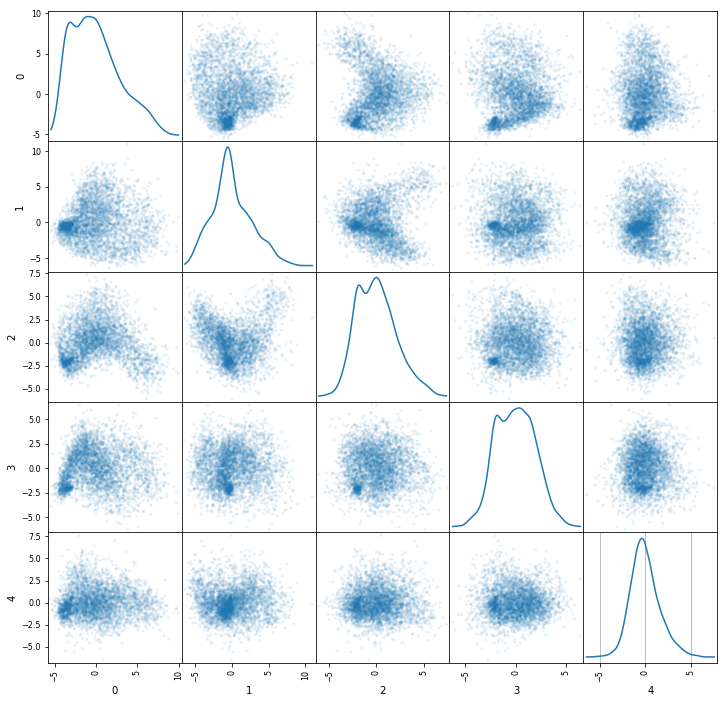

In [249]:
pd.scatter_matrix(pd.DataFrame(X_tr), alpha=0.1, figsize=(12, 12), diagonal='kde')
plt.grid()
plt.show()

In [250]:
X_tr.shape

(3913, 5)

In [251]:
Y.shape

(3913,)

In [255]:
resDtree = experiment(DecisionTreeClassifier(min_samples_leaf=5),
                               X_tr, Y, printing=True)
resRForest = experiment(RandomForestClassifier(n_estimators=1000, min_samples_leaf=5, n_jobs=6),
                               X, Y, printing=True)

             precision    recall  f1-score   support

        0.0       0.83      0.84      0.83      2923
        1.0       0.50      0.47      0.49       990

avg / total       0.74      0.75      0.75      3913

             precision    recall  f1-score   support

        0.0       0.80      0.98      0.88      2923
        1.0       0.85      0.27      0.41       990

avg / total       0.81      0.80      0.76      3913



## True feature selection

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif, chi2
